# Image Compression and Color Quantization

In [0]:
import os
import cv2
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import numpy as np

In [0]:
im = cv2.imread("Swan_web.png")

Original size of Swan's image is: 1168 Kilo Bytes


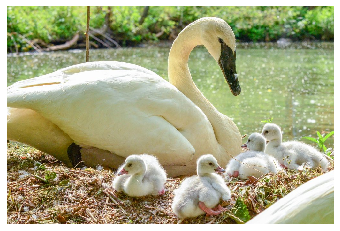

In [0]:
img_corrected = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img_corrected)
print("Original size of Swan's image is: {} Kilo Bytes".format(str(math.ceil((os.stat('Swan_web.png').st_size)/1000))))

In [0]:
# Extracting num_rows and num_cols from bunny's image (stored in im variable)
num_rows = im.shape[0]
num_cols = im.shape[1]
transform_image_for_KMeans = im.reshape(num_rows * num_cols, 3)

In [0]:
num_cols

1024

In [0]:
num_rows

683

In [0]:
transform_image_for_KMeans

array([[ 73, 175, 140],
       [ 69, 172, 135],
       [ 66, 172, 131],
       ...,
       [ 74, 154, 137],
       [ 77, 156, 137],
       [ 81, 160, 141]], dtype=uint8)

In [0]:
# Perform KMeans to compress image, here K = 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(transform_image_for_KMeans)

cluster_centroids = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 

# labels represent the label of each pixel and which cluster it belongs to
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(num_rows,num_cols);   
labels

array([[4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 3, 3, 3],
       [3, 4, 4, ..., 3, 3, 3],
       ...,
       [3, 4, 4, ..., 4, 4, 4],
       [0, 4, 1, ..., 4, 4, 4],
       [0, 4, 1, ..., 4, 4, 4]], dtype=uint8)

 Size of Swan's image is: 327 Kilo Bytes


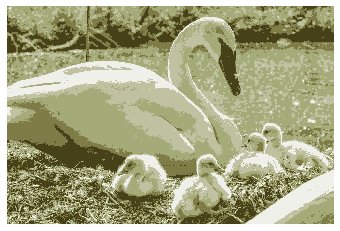

In [0]:
compressed_image = np.zeros((num_rows, num_cols, 3), dtype=np.uint8)
for r in range(num_rows):
    for c in range(num_cols):
        compressed_image[r, c, :] = cluster_centroids[labels[r, c], :]

cv2.imwrite("ima.jpg", compressed_image)
compressed_im = cv2.imread("ima.jpg")
compressed_im_corrected = cv2.cvtColor(compressed_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(compressed_im_corrected) 
print(" Size of Swan's image is: {} Kilo Bytes".format(str(math.ceil((os.stat('ima.jpg').st_size)/1000))))